In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import gaussian_filter
import pandas as pd

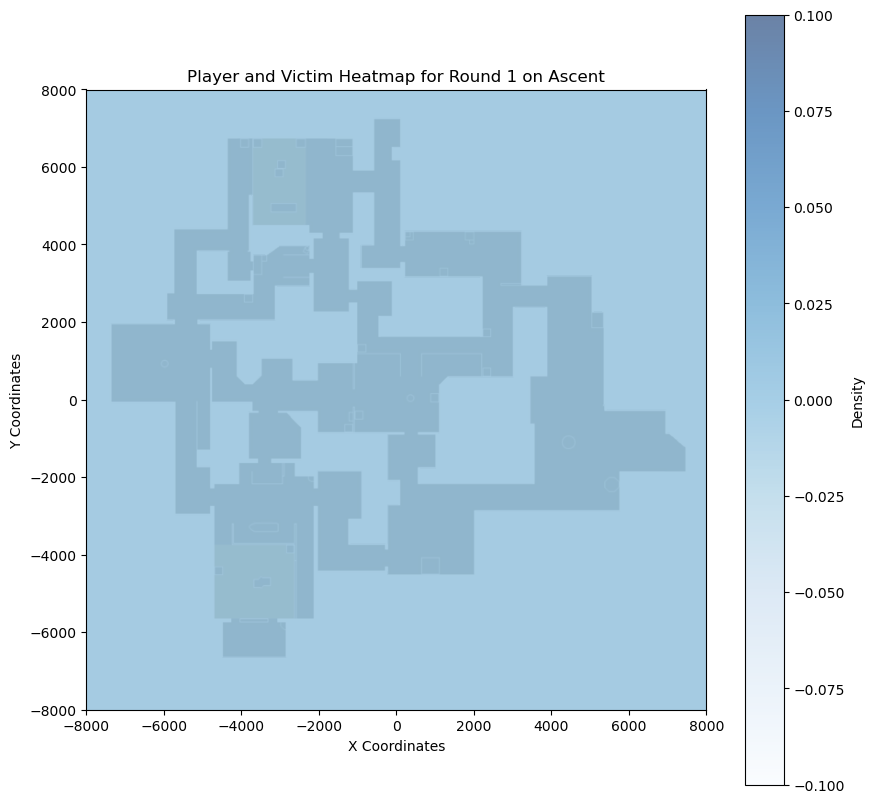

In [2]:

# Load your JSON file
with open('data/game.json') as f:
    data = json.load(f)

# Load the map image (adjust with actual map file path)
map_img = Image.open('images/ascent.png')

# Create extent for the image and heatmap to align them
extent = [-8000, 8000, -8000, 8000]

# Initialize lists for player and victim coordinates
x_player_coords = []
y_player_coords = []
x_victim_coords = []
y_victim_coords = []

# Process only the first round
round_result = data['roundResults'][0]

# Loop through player stats to gather kills
for player_stat in round_result['playerStats']:
    if 'killEvents' in player_stat:
        for kill in player_stat['killEvents']:
            # Player location at the time of the kill
            x_player_coords.append(kill['killerLocation']['x'])
            y_player_coords.append(kill['killerLocation']['y'])
            
            # Victim location at the time of the kill
            x_victim_coords.append(kill['victimLocation']['x'])
            y_victim_coords.append(kill['victimLocation']['y'])

# Create a 2D histogram (heatmap) for player and victim locations
heatmap_player, xedges_player, yedges_player = np.histogram2d(x_player_coords, y_player_coords, bins=100, range=[[-8000, 8000], [-8000, 8000]])
heatmap_victim, xedges_victim, yedges_victim = np.histogram2d(x_victim_coords, y_victim_coords, bins=100, range=[[-8000, 8000], [-8000, 8000]])

# Apply Gaussian smoothing to both heatmaps
heatmap_player = gaussian_filter(heatmap_player, sigma=2)
heatmap_victim = gaussian_filter(heatmap_victim, sigma=2)

# Create a figure for the heatmaps
plt.figure(figsize=(10, 10))

# Plot the map in the background
plt.imshow(map_img, extent=extent, aspect='auto')

# Overlay the heatmap for player locations (in red)
plt.imshow(heatmap_player.T, extent=extent, origin='lower', cmap='Reds', alpha=0.6)

# Overlay the heatmap for victim locations (in blue)
plt.imshow(heatmap_victim.T, extent=extent, origin='lower', cmap='Blues', alpha=0.6)

# Add titles and labels
plt.title(f'Player and Victim Heatmap for Round 1 on Ascent')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')

# Show the colorbar
plt.colorbar(label='Density')

# Display the plot
plt.show()

In [24]:
data['roundResults'][0]['playerStats'][1]['kills'][0]['playerLocations']

[{'puuid': 'FjXIt87aLFSWcVkZJhxiTyAgf90zeiz2yjiPQtxbmng8oYlFeqwS9ziS7-Er8NClXt2ephk_gS754g',
  'viewRadians': 2.7340894,
  'location': {'x': 357, 'y': -6754}},
 {'puuid': 'vnE1JAJyVlf08fJIwuo4zPMjIZZuvlChvEYsDPmMZbdT1Dbg0rmtDLUr1Z22TTfP4pHGEyT-FmbuPA',
  'viewRadians': 0.42098114,
  'location': {'x': -1686, 'y': -6537}},
 {'puuid': 'inxcpz8Bw4qzirO6sd0OPv4q3SnRzLV0ql4Q2XUq65aDRqfrjGwY3Sj54rr0W9qpvmTtINbI0VNITw',
  'viewRadians': 5.2346134,
  'location': {'x': -1688, 'y': -5681}},
 {'puuid': 'HgBQup9MZhYkMyqcw8-HzEqxdL-u4JXfCjAsrTVMSYBTq2djY791__r-XOXx1vkgBXlNmgUvDLxp9Q',
  'viewRadians': 4.126138,
  'location': {'x': 3270, 'y': -7724}},
 {'puuid': 'Y2X9ZAnysEx5cxszvriWCL62y4Q5upG5-CFHafgqUgOgrAk1HHficYZRoOxcdN9bri4rMlcv8798bQ',
  'viewRadians': 1.0820317,
  'location': {'x': 5231, 'y': -6345}},
 {'puuid': 'nfUQ4WkKsOPyWzPtwg1YFzo2OYBJV8IeEVNh17ifENQeHd1dzThvaQy9xi_THtNJFzCYc3O2gp9nJQ',
  'viewRadians': 5.456895,
  'location': {'x': -1893, 'y': -5911}},
 {'puuid': 'qGVUmtCNCmGxJmD4F6iqT

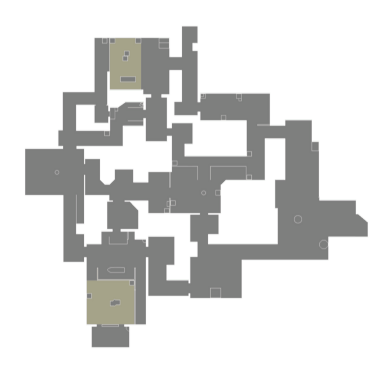

In [31]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Load an image
image_path = "images/ascent.png"  # Replace with your image path
image = Image.open(image_path)

# Define coordinates for the dot
x, y = 357, -6754  # Replace with your desired coordinates

# Define the dot size and color
dot_size = 50
dot_color = (255, 0, 0)  # Red color in RGB

# Create a Draw object and draw the dot
draw = ImageDraw.Draw(image)
draw.ellipse((x - dot_size, y - dot_size, x + dot_size, y + dot_size), fill=dot_color)

# Plot the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off the axis
plt.show()

In [30]:
import matplotlib.pyplot as plt
import cv2

# Load an image
image_path = "images/ascent.png"  # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Function to capture mouse click coordinates
def get_coordinates(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:  # Left button click
        print(f"Clicked coordinates: ({x}, {y})")
        # Optionally, draw a dot at the clicked position
        cv2.circle(image, (x, y), 5, (0, 0, 255), -1)  # Draw a red dot

# Display the image
cv2.imshow("Image", image)
cv2.setMouseCallback("Image", get_coordinates)

cv2.waitKey(0)  # Wait for a key press
cv2.destroyAllWindows()  # Close the window

Clicked coordinates: (202, 333)
Clicked coordinates: (592, 16)
Clicked coordinates: (629, 26)
Clicked coordinates: (652, 23)
Clicked coordinates: (671, 24)
Clicked coordinates: (669, 19)
Clicked coordinates: (672, 9)
Clicked coordinates: (673, 2)
